## Probability Distributions
### Random Variables

┌ Info: Recompiling stale cache file C:\Users\quf93\.julia\compiled\v1.1\PyPlot\oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


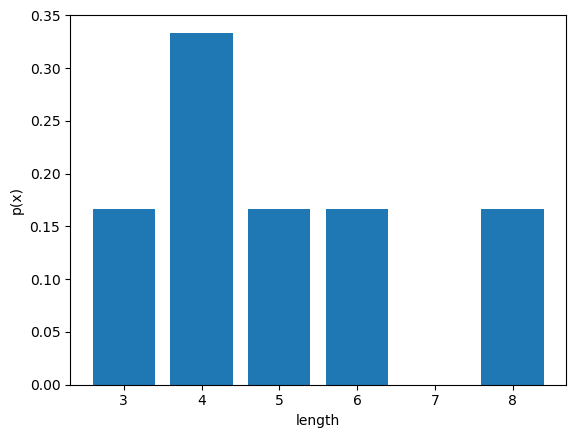

PyObject Text(24.000000000000007, 0.5, 'p(x)')

In [1]:
using StatsBase, PyPlot

names = ["Mary", "Mel", "David", "John", "Kayley", "Anderson"]

randomName() = rand(names)

X = 3:8
N = 10^6

samples_lengths = [length(randomName()) for _ in 1:N]

bar(X, counts(samples_lengths) / N)
xlabel("length")
ylabel("p(x)")

### Types of Random Variables  
### discrete random variable
    Probability Mass Function(PMF)  
    ∑xp(x) = 1

### continuous random variable  
    Probability Density Function(PDF)  
    ∫f(x)dx = 1

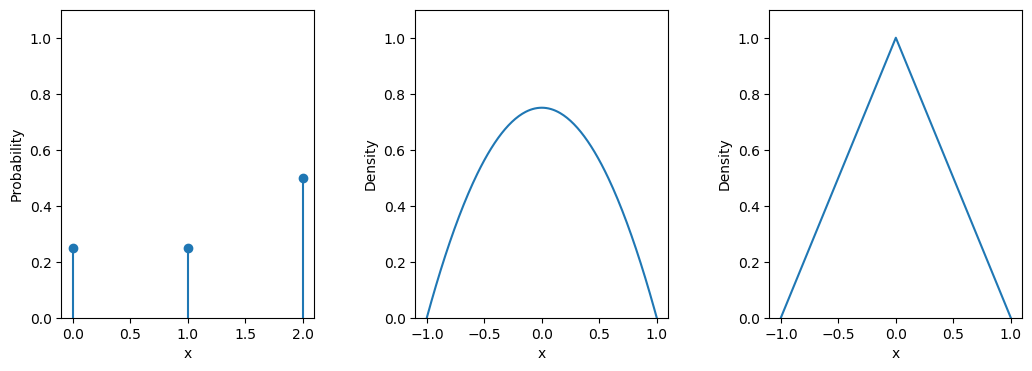

PyObject Text(732.1052631578949, 0.5, 'Density')

In [4]:
using PyPlot

discrete_p = [.25, .25, .5]
discrete_x_grid = 0:2

continuous_p1(x) = (3 / 4) * (1 - x^2)
continuous_p2(x) = x < 0 ? x + 1 : 1 - x
continuous_x_grid = -1:.01:1

figure(figsize=(12.4, 4))
subplots_adjust(wspace=.4)

subplot(131)
stem(x_grid_disc, discrete_p, basefmt="none")
ylim(0, 1.1)
xlabel("x")
ylabel("Probability")

subplot(132)
plot(continuous_x_grid, continuous_p1.(continuous_x_grid))
ylim(0, 1.1)
xlabel("x")
ylabel("Density")

subplot(133)
plot(x_grid_cont, continuous_p2.(continuous_x_grid))
ylim(0, 1.1)
xlabel("x")
ylabel("Density")

### Moment Based Descriptors  
### Mean  
    The mean, also known as the expected value of a random variable X, is a measure of the central tendency of the distribution of X.  
    
    The mean of a discrete distribution with PMF p(x) is E[X] = ∑xp(x)  
    
    The mean of a continuous random variable, with PDF f(x) is E[X] = ∫xf(x)dx

In [6]:
# one-dimensional numeriacl integration via adaptive Gauss-Kronrod quadrature
using QuadGK 

sup = (-1, 1)
f1(x) = 3/4 * (1-x^2)
f2(x) = x < 0 ? x + 1 : 1 - x

expect(f, support) = quadgk((x) -> x * f(x), support[1], support[2])[1]

expect(f1, sup), expect(f2, sup)

(0.0, -2.0816681711721685e-17)

### General Expectation and Moments  

    for discrete,  
    E[Y] = E[h(X)] = ∑h(x)p(x)  

    for continuous,  
    E[Y] = E[h(X)] = ∫h(x)f(x)dx  
    
    h(x) = xⁿ, n-th moment of X,  
    E[xⁿ] = ∫xⁿf(x)dx

### Variance  
    The variance of a random variable X, often denoted Var(X) or σ², is a measure of the spread, or dispersion,  
    of the distribution of X.  
    
    Var(X) = E[(X - E[X]²)] = E[X²] - (E[X])²  
    
    h(x) = (x - E[X])²

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[8]:12
└ @ Core In[8]:12


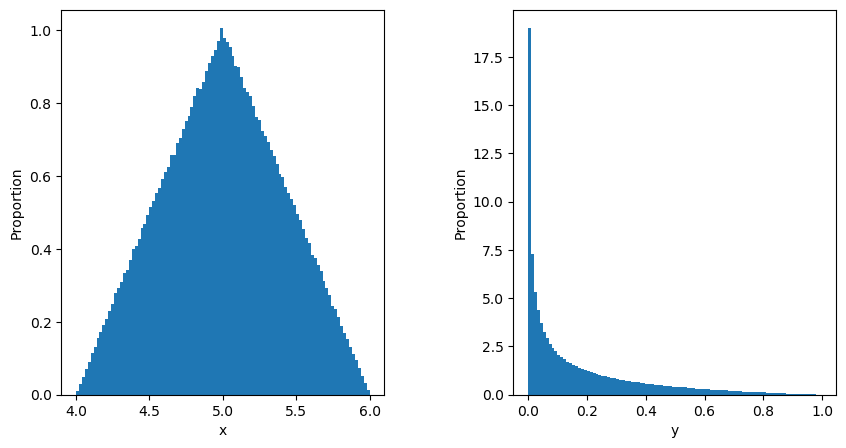

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[8]:17
└ @ Core In[8]:17


(0.16680413103109526, 0.16680429584289938)

In [8]:
using Distributions, PyPlot

dist = TriangularDist(4, 6, 5)
N = 10^6
data = rand(dist, N)
y_data = (data.-5).^2

figure(figsize=(10, 5))
subplots_adjust(wspace=.4)

subplot(121)
plt[:hist](data, 100, normed="true")
xlabel("x")
ylabel("Proportion")

subplot(122)
plt[:hist](y_data, 100, normed="true")
xlabel("y")
ylabel("Proportion")

mean(y_data), var(data)

### Higher Order Descriptors: Skewness and Kurtosis  

### Skewness  
    E[X] = μ and Var(X) = σ², then the skewness, is defined as,
    E[((X - μ) / σ)³] = (E[X³] - 3μσ²-μ³) / σ³  
    
### Kurtosis
    E[((X - μ) / σ)⁴] = (E[(X-μ)⁴] / σ⁴  

### Functions Describing Distributions  

     A probability distribution can be described by a probability mass function (pmf) in the discrete case or  
     a probability density function(pdf) in continuous case.
    
     However, there are other popular descriptors of probability distributions, such as the cumulative distribution function (cdf).
    
     Then there are also transform based descriptors including the moment generating function (mgf),  
     probability generating function (pgf), as well as related functions such as the characteristic function (cf),  
     or alternative names, including the Laplace transform, Fourier transform or z transform.

### Cumulative Probabilities  
    cumulative distribution function(cdf), F(x) = P(X ≤ x)
    
    complementary cumulative distribution function (ccdf), 1 - F(x) = P(X > x)
    
    lim F(x) = 0 and lim F(x) = 1
    x->-∞           x->∞
    
    In the case of a continuous random variable,
    f(x) = dF(x)/dx and F(x) = ∫f(t)dt
    
    f(x) ≥ 0, and ∫f(x)dx = 1  
    
    F(x) = P(X ≤ x) = ∫f(u)du ≈ ∑ f(u)△x

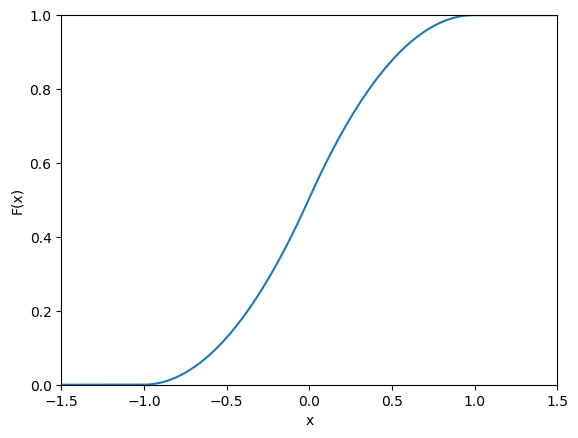

PyObject Text(24.000000000000007, 0.5, 'F(x)')

In [9]:
using PyPlot

f2(x) = (x < 0 ? x + 1 : 1 - x) * (abs(x) < 1 ? 1 : 0)
a, b = -1.5, 1.5
delta = .01

# Riemann sum
F(x) = sum([ f2(u) * delta for u in a:delta:x ])

x_grid = a:delta:b
y = [ F(u) for u in x_grid ]
plot(x_grid, y)
xlim(a, b)
ylim(0, 1)
xlabel("x")
ylabel("F(x)")